Let's ask a few questions and see what we shake out.

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import utils

In [4]:
df = pd.read_csv('silverpop_dump.CSV')
df.columns

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Account ID', 'Account Type', 'Activated Status', 'Age',
       'Background Check Date', 'Birthday', 'Body Type', 'Children', 'City',
       'Country', 'Drinking Habit', 'Ethnicity', 'Exit Reason',
       'Favorites Received', 'Favorites Sent', 'Gender', 'Hair Color',
       'Income', 'Joined Date', 'Language', 'Last Activity Country',
       'Last Activity Date', 'Last Login Date', 'Last Updated Date',
       'Last Upgrade Date', 'Marital Status', 'Messages Received',
       'Messages Sent', 'Net Worth', 'Orientation', 'Past Session Count',
       'Private Photo Count', 'Profile Approval Status',
       'Profile Completion Percent', 'Public Photo Count',
       'Recurring Subscription', 'Region', 'Revenue', 'Smoking Habit',
       'Status', 'Subscription Charge Date', 'Subscription Expiration Date',
       'Subscription Package', 'Subscription Status', 'Unread Message Count',
       'Upgrade Count', 'Username'],
      dtype='object')

In [266]:
[np.random.choice(df['Username'].dropna().values) for _ in range(100)]

['Echohead',
 'Frau Marian',
 'M P 100',
 'MissSEFox',
 'scottrange',
 'coolone44',
 'W77',
 'Johnnyboi4940',
 'Psyopn',
 'jimdawg4444444444',
 'LillyGha',
 'centarkguy',
 'poppa bear',
 'yasamin707',
 'Azra',
 'shakey1010',
 'devtoonice',
 'Shawn2212',
 'ZedRay',
 'elizabethm16',
 'Galaxy Jumper',
 'Emda98',
 'Rob549',
 'SaltLifeSnuggle',
 'TTT3',
 'Bmeyers',
 'Hunny01',
 'Heather234',
 'TheWith',
 'Van25',
 'TomTom7',
 'Corporate Gent',
 'Rainndrop',
 'Zues777',
 'Soney1',
 'JJ2U',
 'sabi786',
 'Tanner Tsao',
 'Indiana-Jones',
 'kurte1189',
 'Joy_and_Freedom',
 'iwannasee',
 'Haramel',
 'KC sugar daddy',
 'WinKYMountains',
 'Xun H',
 'Felixnyc',
 '77s',
 'Alex',
 'saywhat19',
 'Skylerjay',
 'Personnalshopper',
 'homogenius',
 'Dolce01',
 'KissandFly',
 'Sangn',
 'Lola695',
 'A-san',
 'Fun_in_and_Outdoors',
 'XoticxHottestGodess',
 'Vacation Break',
 'chocolatedesire4u',
 'Raoul92',
 'MrRightnow420',
 '高品质服务',
 'oredis',
 'CuteRooBerry',
 'Toney',
 'Stacy907',
 'Chris_187',
 'Brent70'

In [300]:
len(df)

116265

## Remove Egregious Outliers

In [302]:
ddf = df
ddf['Favorites Received'].describe()

count    116130.000000
mean        339.007974
std        1043.012345
min           0.000000
25%           0.000000
50%          41.000000
75%         269.000000
max       87509.000000
Name: Favorites Received, dtype: float64

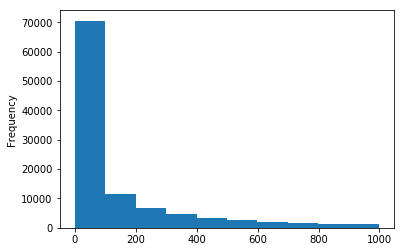

In [40]:
ddf = ddf[ddf['Favorites Received'] < 1000]
ddf['Favorites Received'].plot(kind='hist')

In [41]:
ddf['Messages Received'].describe()

count    78362.000000
mean       772.619331
std       1776.905111
min        -24.000000
25%         20.000000
50%        205.000000
75%        804.000000
max      91754.000000
Name: Messages Received, dtype: float64

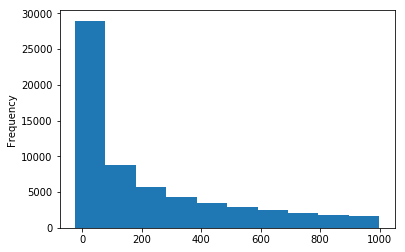

In [42]:
ddf = ddf[ddf['Messages Received'] < 1000]
ddf['Messages Received'].plot(kind='hist')

In [43]:
ddf['Messages Sent'].describe()

count    61967.000000
mean       238.631417
std        357.154181
min          0.000000
25%          6.000000
50%         82.000000
75%        340.000000
max      10569.000000
Name: Messages Sent, dtype: float64

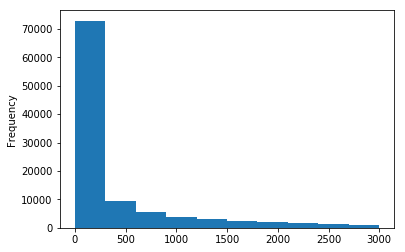

In [303]:
ddf = ddf[ddf['Messages Sent'] < 3000]
ddf['Messages Sent'].plot(kind='hist')

In [45]:
ddf['Favorites Sent'].describe()

count    61936.000000
mean       115.972778
std        387.675473
min          0.000000
25%          1.000000
50%         19.000000
75%         92.000000
max      33671.000000
Name: Favorites Sent, dtype: float64

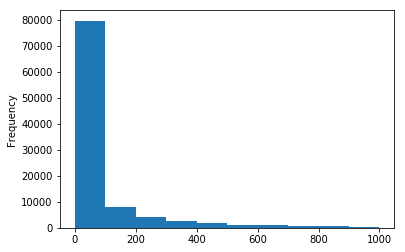

In [304]:
ddf = ddf[ddf['Favorites Sent'] < 1000]
ddf['Favorites Sent'].plot(kind='hist')

In [305]:
len(ddf)

100186

## How does profile completion affect engagement?

Sites like LinkedIn REALLY like to nag you to fill out your profile, usually with the claim the you get more views, more engagements, with a fully fleshed-out profile. Is this true?

In [306]:
plt.scatter(ddf['Profile Completion Percent'], ddf['Messages Received'], alpha=0.2)

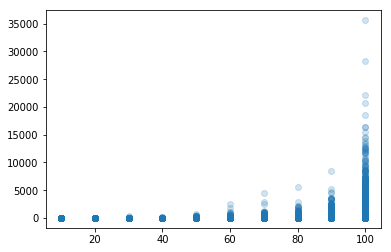

In [307]:
plt.scatter(ddf['Profile Completion Percent'], ddf['Favorites Received'], alpha=0.2)

After killing all the obvious spam, we kind of see a correlation, but not such a strong one. At the very least, people at less than 50% profile completion definitely get less engagement.

But how much of this is correlated with activity in general? Intuitively, you get messages if you engage first. (We don't know how many of these, either, are first engagements, or the result of long-running messages.)

In [215]:
import ipyvolume as ipv
ipv.quickscatter(ddf['Profile Completion Percent'], ddf['Messages Sent'], ddf['Messages Received'])

A Jupyter Widget

I'm honestly not sure how to interpret that but damn does it look cool.

What it seems like is that, in general, messages sent correlates to messages received more than profile completion does. Aaaaand this holds, in general:

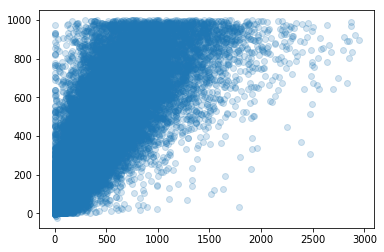

In [212]:
plt.scatter(ddf['Messages Sent'], ddf['Messages Received'], alpha=0.2)

In [70]:
ddf['Profile Completion Percent'].plot(kind='hist')

And anyway, most of the data is skewed hard to the 80-100% range.

What about photos?

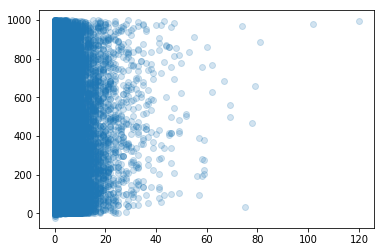

In [211]:
plt.scatter(ddf['Public Photo Count'], ddf['Messages Received'], alpha=0.2)

Interesting! There's actually very little correlation between the number of public photos, and the number of messages received.

...Well, maybe I'm still dealing with a bunch of bots. Hmmmm...

An issue is that we have no way of knowing what's spam, and what's legitimate conversations...

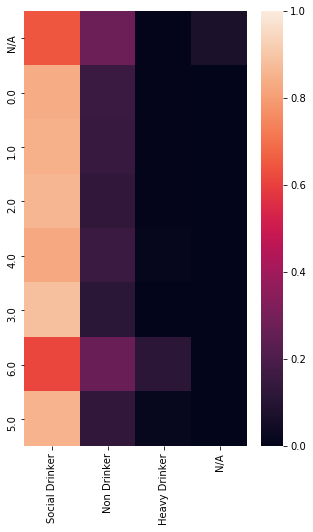

In [177]:
from importlib import reload
reload(utils)

# This bit's just for fun. And as a showing off of sample code.
# Regularizes the frequency values to per-row percentages.
freqs = utils.cross_frequencies(ddf, 'Children', 'Drinking Habit', dropna=False)
for i in freqs.index:
    row = freqs.loc[i]
    freqs.loc[i] = row / sum(row)
fig, ax = plt.subplots(figsize=(5,8))
sns.heatmap(freqs, vmax=1., ax=ax)

## Individual Baby/Daddy Studies

Split off into babies/daddies for further study.

In [186]:
babies = ddf[(ddf['Account Type'] == 'Attractive') & (ddf['Gender'] == 'Female')]
len(babies)

31349

In [187]:
daddies = ddf[(ddf['Account Type'] == 'Generous') & (ddf['Gender'] == 'Male')]
len(daddies)

23320

One cute fact that's obvious but cute is that babies very rarely publish their income, whereas daddies almost always do. Ditto for net worth.

In [188]:
babies['Income'].value_counts(dropna=False)

NaN           31228
 50000.0         71
 75000.0         12
 100000.0         8
 150000.0         6
 1000001.0        5
 1000000.0        5
 125000.0         4
 500000.0         3
 175000.0         3
 300000.0         1
 200000.0         1
 250000.0         1
 400000.0         1
Name: Income, dtype: int64

In [189]:
daddies['Income'].value_counts(dropna=False)

 100000.0     2734
NaN           2702
 150000.0     1936
 50000.0      1905
 250000.0     1844
 200000.0     1804
 75000.0      1677
 500000.0     1667
 125000.0     1641
 300000.0     1504
 1000001.0    1102
 175000.0     1078
 400000.0     1029
 1000000.0     697
Name: Income, dtype: int64

In [192]:
babies['Net Worth'].value_counts(dropna=False)

NaN             31223
 100000.0          83
 250000.0          12
 500000.0           8
 1000000.0          7
 2000000.0          6
 750000.0           5
 100000001.0        3
 50000000.0         1
 100000000.0        1
Name: Net Worth, dtype: int64

In [193]:
daddies['Net Worth'].value_counts(dropna=False)

 100000.0       3475
 1000000.0      3321
 2000000.0      3095
NaN             2872
 500000.0       2663
 250000.0       2336
 5000000.0      2066
 750000.0       1462
 10000000.0     1257
 50000000.0      417
 100000001.0     257
 100000000.0      99
Name: Net Worth, dtype: int64

What this mostly tells us is that we can't really use income or net worth on babies, but it's likely to be an interesting source of info for daddies.

### Attractive Females

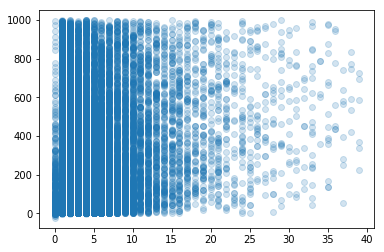

In [216]:
b = babies[babies['Public Photo Count'] < 40]
plt.scatter(b['Public Photo Count'], b['Messages Received'], alpha=0.2)

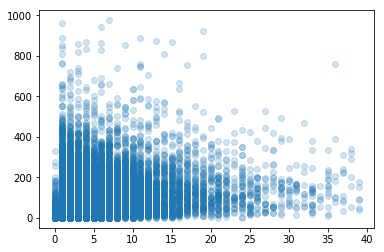

In [217]:
b = babies[babies['Public Photo Count'] < 40]
plt.scatter(b['Public Photo Count'], b['Favorites Received'], alpha=0.2)

Interesting. So the number of favorites you get actually seems to drop the more public photos you have...that's unintuitive.

Okay screw it. Let's choose some subset of columns, run GMM on it, and see what pops out.

In [272]:
# These columns are all numeric so we can pretty safely run generic clustering on it.
columns = ['Age', 'Children', 'Profile Completion Percent',
           'Public Photo Count', 'Private Photo Count',
           'Messages Received', 'Messages Sent',
           'Favorites Received', 'Favorites Sent']
b = babies[columns].dropna()
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(4)
gm.fit(b.values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [283]:
pd.Series(gm.predict(b.values)).value_counts()

2    17735
0     4484
3     2513
1      800
dtype: int64

([<matplotlib.axis.XTick at 0x7ff73899fd68>,
 <a list of 9 Text xticklabel objects>)

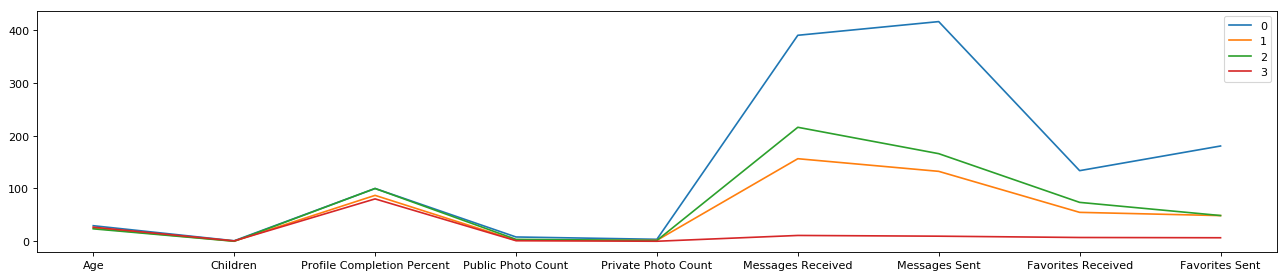

In [292]:
plt.figure(num=None, figsize=(20, 4), dpi=80)
for mean in gm.means_:
    plt.plot(mean)
plt.legend([0, 1, 2, 3])
plt.xticks(range(9), columns)

### Generous Males

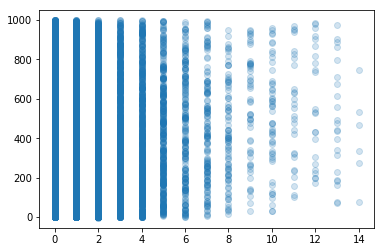

In [219]:
d = daddies[daddies['Public Photo Count'] < 15]
plt.scatter(d['Public Photo Count'], d['Messages Received'], alpha=0.2)

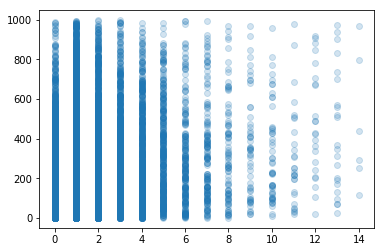

In [221]:
d = daddies[daddies['Public Photo Count'] < 15]
plt.scatter(d['Public Photo Count'], d['Favorites Received'], alpha=0.2)

Does income or net worth impact messages/favorites? Due to a rather annoying gap in the data, we'll treat millionaires on their own.

9819


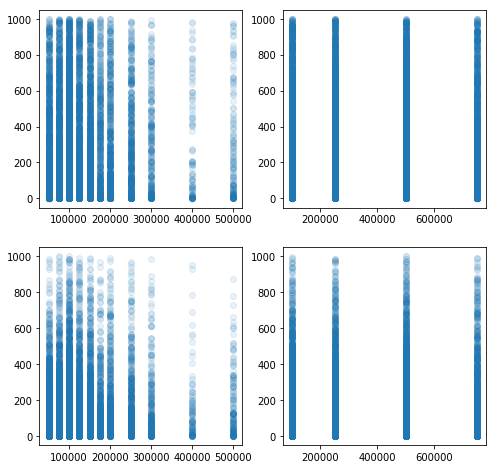

In [230]:
d = daddies[daddies['Income'] < 1000000]
d = d[d['Net Worth'] < 1000000]
print(len(d))
fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax[0][0].scatter(d['Income'], d['Messages Received'], alpha=0.1)
ax[1][0].scatter(d['Income'], d['Favorites Received'], alpha=0.1)
ax[0][1].scatter(d['Net Worth'], d['Messages Received'], alpha=0.1)
ax[1][1].scatter(d['Net Worth'], d['Favorites Received'], alpha=0.1)

Not seeing any really useful correlations again...except higher net worth and income *seems* to lead to lower messages and favorites? Maybe such high-value men are just considered out of most sugar babies' range?

In [297]:
# These columns are all numeric so we can pretty safely run generic clustering on it.
columns = ['Age', 'Children', 'Profile Completion Percent',
           'Public Photo Count', 'Private Photo Count',
           'Messages Received', 'Messages Sent',
           'Favorites Received', 'Favorites Sent']
d = daddies[columns].dropna()
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(4)
gm.fit(d.values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [298]:
pd.Series(gm.predict(b.values)).value_counts()

3    19378
0     4930
1      944
2      280
dtype: int64

In [299]:
plt.figure(num=None, figsize=(20, 4), dpi=80)
for mean in gm.means_:
    plt.plot(mean)
plt.legend([0, 1, 2, 3])
plt.xticks(range(9), columns)

([<matplotlib.axis.XTick at 0x7ff738933358>,
 <a list of 9 Text xticklabel objects>)